##### Alpha191_001 (-1 * CORR(RANK(DELTA(LOG(VOLUME), 1)), RANK(((CLOSE - OPEN) / OPEN)), 6))

In [1]:
# from cylib.apis.all_api import *
import pandas as pd
import numpy as np
# http://81.70.87.175:8000/user/huh/?token=bff7521c71384e8c9b0bcffdc93ff659
# New: http://81.70.168.4:8000/user/huh/?token=9671de2a80694091a068b2d527d9e987

In [2]:
# dic = {'A': [1, 2, 3, 4],
#        'B': [2, 3, 4, 5]}
# df = pd.DataFrame(dic)
# print(df)
# print(type(df))
# new_df = fixcol_unstack(df[['A']]) # ?

#### `pivot()`
To transform your time series stock data where each stock's open value is a feature and each row represents a day, you can use the `pivot` function in pandas. This function allows you to reshape your DataFrame based on the values in the specified columns. Here's an example of how you can achieve this transformation:

Assuming you have a DataFrame called `stock_data` with columns "date", "stock", "open", "high", "low", and "close", where each row represents a day's data for a particular stock, you can pivot the data to have stocks as columns and the open values as the data points. Here's how you can do it:

```python
import pandas as pd

# Assuming you have a DataFrame called stock_data
# Create a sample DataFrame for demonstration
data = {
    'date': ['2023-11-01', '2023-11-01', '2023-11-02', '2023-11-02'],
    'stock': ['AAPL', 'GOOGL', 'AAPL', 'GOOGL'],
    'open': [150.0, 2800.0, 152.0, 2820.0],
    'high': [155.0, 2850.0, 154.0, 2830.0],
    'low': [148.0, 2780.0, 151.0, 2800.0],
    'close': [152.0, 2825.0, 150.0, 2815.0]
}
stock_data = pd.DataFrame(data)
print(stock_data)

# Pivot the DataFrame
pivoted_stock_data = stock_data.pivot(index='date', columns='stock', values='open')

print(pivoted_stock_data)

'''
         date  stock    open    high     low   close
0  2023-11-01   AAPL   150.0   155.0   148.0   152.0
1  2023-11-01  GOOGL  2800.0  2850.0  2780.0  2825.0
2  2023-11-02   AAPL   152.0   154.0   151.0   150.0
3  2023-11-02  GOOGL  2820.0  2830.0  2800.0  2815.0

stock        AAPL   GOOGL
date                     
2023-11-01  150.0  2800.0
2023-11-02  152.0  2820.0
'''
```

In this example, `pivot` is used to reshape the DataFrame. The `index` parameter specifies the column containing the dates, the `columns` parameter specifies the column containing the stock names, and the `values` parameter specifies the column containing the open values. The resulting `pivoted_stock_data` DataFrame will have stocks as columns and the open values as the data points, with each row representing a day's data.

This transformation will allow you to analyze the open values of each stock over time more effectively.

#### 一、基础因子数据结构

In [3]:
# trade_date = datetime.datetime(2023, 11, 14).strftime("%Y%m%d") # today
# trade_date

In [4]:
# trade_date = datetime.datetime.today().strftime("%Y%m%d") # today

# trade_date = '20231114'
# start_date = (datetime.datetime(2023, 11, 14) - datetime.timedelta(days=365)).strftime("%Y%m%d") # start day
# basic_factors_df = get_list_factors(factor_name_list=['open','close','low','high','avg_price',
#                                                       'adj_close','amount','volume','turn'],
#                                     start_date=start_date,
#                                     end_date=trade_date,
#                                     ts_code_list=[])

In [5]:
basic_factors_df = pd.read_csv('basic_factors_df.csv')

In [6]:
basic_factors_df

,trade_date,ts_code,open,close,low,high,avg_price,adj_close,amount,volume,turn
0,2022-11-14,000001.SZ,11.70,11.95,11.70,12.28,11.9776,1361.5400,4637820.0,3872080.0,1.9953
1,2022-11-14,000002.SZ,16.19,16.39,15.99,16.84,16.3959,2832.5900,4673830.0,2850610.0,2.9335
2,2022-11-14,000004.SZ,9.31,9.54,9.31,9.56,9.4808,38.7700,15162.7,15993.0,1.3748
3,2022-11-14,000005.SZ,1.79,1.77,1.76,1.80,1.7771,16.4000,10108.7,56882.2,0.5377
4,2022-11-14,000006.SZ,4.17,4.15,4.08,4.20,4.1477,161.6000,114133.0,275171.0,2.0383
...,...,...,...,...,...,...,...,...,...,...,...
1214892,2023-11-14,688799.SH,44.79,44.30,43.76,44.79,44.2473,46.3438,50287.2,11365.0,2.0119
1214893,2023-11-14,688800.SH,42.76,46.78,42.76,47.21,45.5607,66.1561,272366.0,59780.9,5.6085
1214894,2023-11-14,688819.SH,31.55,31.65,31.41,31.78,31.5992,33.2256,38732.3,12257.4,0.9364
1214895,2023-11-14,688981.SH,54.22,54.65,53.96,54.88,54.3588,54.6500,1248170.0,229617.0,1.1634


In [7]:
type(basic_factors_df)

pandas.core.frame.DataFrame

In [8]:
# basic_factors_df.to_csv('basic_factors_df.csv')

In [9]:
# OPEN_DF = fixcol_unstack(basic_factors_df[['open']])
OPEN_DF = basic_factors_df.pivot(index='trade_date', columns='ts_code', values='open')
OPEN_DF

ts_code,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2022-11-14,11.70,16.19,9.31,1.79,4.17,8.10,2.50,12.85,3.28,10.55,...,61.69,42.98,192.00,47.70,99.30,34.60,116.55,39.90,40.79,NaN
2022-11-15,11.86,16.30,9.54,1.77,4.14,8.15,2.50,12.56,3.26,10.29,...,58.99,43.61,179.98,46.00,95.40,35.98,113.00,40.78,41.40,NaN
2022-11-16,11.97,16.14,9.55,1.78,4.20,8.19,2.49,12.96,3.26,10.40,...,61.47,45.59,174.99,45.22,110.43,36.12,116.25,40.40,42.79,NaN
2022-11-17,11.81,15.87,9.65,1.78,4.19,8.18,2.44,13.08,3.25,10.26,...,59.84,44.00,171.91,45.00,106.85,37.00,110.01,39.58,42.20,NaN
2022-11-18,11.74,15.78,9.92,1.79,4.15,8.20,2.45,13.01,3.26,10.35,...,63.45,43.78,174.86,44.25,115.00,36.69,108.48,38.27,42.63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,10.58,11.83,16.80,1.41,4.48,5.13,2.39,11.11,3.93,9.34,...,74.00,39.60,103.55,38.43,88.00,44.63,41.58,32.25,57.20,33.08
2023-11-09,10.46,12.10,16.89,1.40,4.52,5.12,2.39,11.10,3.72,9.49,...,75.50,39.15,103.85,38.13,86.00,45.15,42.10,31.98,58.01,33.88
2023-11-10,10.45,11.91,18.30,1.38,4.47,5.01,2.36,10.99,3.65,9.48,...,74.21,38.72,102.25,38.43,83.44,44.88,41.05,31.91,55.55,34.50


In [10]:
CLOSE_DF = basic_factors_df.pivot(index='trade_date', columns='ts_code', values='close')
VOLUME_DF = basic_factors_df.pivot(index='trade_date', columns='ts_code', values='volume')

#### 二、转换算子定义方式

In [11]:
def LOG(df):
    return np.log(df+0.001)  #0.001避免除0，base是e

In [12]:
def DELTA(df, n: int):
    df_shift1 = df.shift(n)
    return df_shift1 - df

```python
data = pd.DataFrame([2, 4, 3, 5, 7])
data_shift = data.shift(2) # move back 2 units
difference = data_shift - data
# difference.dropna(inplace=True)
difference

	0
0	NaN
1	NaN
2	-1.0
3	-1.0
4	-4.0
```

In [13]:
def RANK(df):
    return df.rank(axis=0)

```python
data = pd.Series([10, 20, 15, 30, 25])
result = data.rank()
print(result)

0    1.0
1    3.0
2    2.0
3    5.0
4    4.0
dtype: float64
```

In [14]:
# bad coding
def CORR(df_a, df_b,n: int):
    adf = df_a[-n:]
    bdf = df_b[-n:]
    re_df = df_a[-1:].copy()
    for stock_code in adf.columns:
        re_df.loc[:,stock_code] = adf[stock_code].corr(bdf[stock_code])    
        # 应该想办法使用矩阵实现，提高运算速度，或者使用numpy和pandas已有的工具函数并配合rolling函数进行实现
    return re_df

In [15]:
# good coding
def CORR(df_a, df_b, n: int):
    return df_a.rolling(n).corr(df_b)

The function `CORR` you've defined calculates the rolling correlation between two dataframes, `df_a` and `df_b`, over a window of size `n`. Here's how it works:

1. `df_a.rolling(n)`: This creates a rolling object for `n` periods. The rolling method provides rolling windows over the data. On this rolling object, we can apply various functions such as mean, std (standard deviation), etc. to get the respective values within this window.

2. `.corr(df_b)`: This calculates the correlation between the corresponding values in `df_a` and `df_b` within the rolling window.

The output will be a DataFrame that represents the rolling correlation between `df_a` and `df_b`.

Please note that this function assumes that `df_a` and `df_b` are pandas DataFrames and have the same shape and index. If they don't, you might need to preprocess your data before using this function. Also, `n` should be an integer that represents the size of the rolling window. 

Here is an example of how you can use this function:

```python
import pandas as pd
import numpy as np

# Create two dataframes
np.random.seed(0)
df_a = pd.DataFrame(np.random.rand(10, 3), columns=list('ABC'))
df_b = pd.DataFrame(np.random.rand(10, 3), columns=list('ABC'))

# Use the function
result = CORR(df_a, df_b, 3)
print(result)
```

This will print the rolling correlation between `df_a` and `df_b` with a window size of 3. The result is another DataFrame with the same shape as the input, but the first `n-1` rows will be `NaN` because there are not enough data points to calculate the correlation. 

#### Example
```python
# Creating sample data
# data_a = {'A': [1, 2, 3, 4, 5]}
# data_b = {'B': [2, 4, 6, 8, 10]}
# df_a = pd.DataFrame(data_a)
# df_b = pd.DataFrame(data_b)

# # Calling the CORR function with a rolling window of size 2
# result = CORR(df_a, df_b, 2)
# print(result)

# Create two dataframes
np.random.seed(0)
df_a = pd.DataFrame(np.random.rand(10, 3), columns=list('ABC'))
df_b = pd.DataFrame(np.random.rand(10, 3), columns=list('ABC'))
print(df_a)
# print(df_b)

# Use the function
result = CORR(df_a, df_b, 3)
print(result)

          A         B         C
0  0.548814  0.715189  0.602763
1  0.544883  0.423655  0.645894
2  0.437587  0.891773  0.963663
3  0.383442  0.791725  0.528895
4  0.568045  0.925597  0.071036
5  0.087129  0.020218  0.832620
6  0.778157  0.870012  0.978618
7  0.799159  0.461479  0.780529
8  0.118274  0.639921  0.143353
9  0.944669  0.521848  0.414662
          A         B         C
0       NaN       NaN       NaN
1       NaN       NaN       NaN
2 -0.621233  0.835700  0.975580
3 -0.949306  0.971568  0.995371
4  0.397574 -0.284783  0.533256
5  0.973211 -0.138944 -0.980017
6 -0.689915 -0.048745 -0.516229
7 -0.930732  0.207826  0.979003
8  0.858620 -0.672356 -0.421090
9  0.515162 -0.944424 -0.936754
```

Let's break down the provided function using mathematical formulas:

Given:
- `df_a` and `df_b`: Two pandas DataFrames containing the data for which we want to calculate the rolling correlation.
- `n`: An integer representing the size of the rolling window.

The rolling correlation calculation can be explained as follows:

1. **Input Parameters**:
   - $ df_a = \{X_{1a}, X_{2a}, \ldots, X_{ma}\}$, where $ m $ is the number of rows in `df_a`.
   - $ df_b = \{X_{1b}, X_{2b}, \ldots, X_{mb}\}$, where $ m $ is the number of rows in `df_b`.

2. **Rolling Correlation Calculation**:
   - For each column $X_{ia}$ in `df_a` and its corresponding column $X_{ib}$ in `df_b`, we apply a rolling window of size $n$ to calculate the correlation between the two variables.
   - Let's consider a specific time point $t$ and calculate the correlation between the two variables at that time:
     - $X_{ia}^{(t)}$ represents the value of the $ith$ column in `df_a` at time $t$.
     - $X_{ib}^{(t)}$ represents the value of the $ith$ column in `df_b` at time t.
     - We have a window of size $n$ centered at time $t$. This window includes the values $X_{ia}^{(t-n+1)}, X_{ia}^{(t-n+2)}, \ldots, X_{ia}^{(t)}$ from `df_a` and $X_{ib}^{(t-n+1)}, X_{ib}^{(t-n+2)}, \ldots, X_{ib}^{(t)}$ from `df_b`.
     - We calculate the correlation between these two sets of values using the following formula:
       $ \text{corr}(X_{ia}^{(t)}, X_{ib}^{(t)}) = \frac{{\sum_{j=t-n+1}^{t} (X_{ia}^{(j)} - \bar{X}_{ia}) \cdot (X_{ib}^{(j)} - \bar{X}_{ib})}}{{\sqrt{\sum_{j=t-n+1}^{t} (X_{ia}^{(j)} - \bar{X}_{ia})^2} \cdot \sqrt{\sum_{j=t-n+1}^{t} (X_{ib}^{(j)} - \bar{X}_{ib})^2}}} $
     - Here, $\bar{X}_{ia}$ and $\bar{X}_{ib}$ represent the means of $X_{ia}$ and $X_{ib}$, respectively.

3. **Return Value**:
   - The function returns a pandas DataFrame containing the rolling correlation values for each pair of columns in `df_a` and `df_b`.

In summary, the provided function calculates the rolling correlation between pairs of variables from the input DataFrames `df_a` and `df_b` over a window of size `n`. It applies the formula for the correlation coefficient to each window of data and returns a DataFrame with the resulting rolling correlation values.

> Q: Does the length of X have to equal to the length of Y?
> 
> A: No, the length of time series X does not need to be equal to the length of time series Y when calculating the rolling correlation.
> When computing the rolling correlation, it's common to use a rolling window approach where a fixed-size window moves across the time series data. As a result, the length of X and Y can be different, and the correlation will be calculated within the overlapping window.
> For example, if X has 100 data points and Y has 120 data points, you can still calculate the rolling correlation using a rolling window approach with an appropriate window size, and the correlation will be calculated for the overlapping segments of X and Y.
> The rolling correlation calculation considers the overlapping portion of the time series within the rolling window, allowing for different lengths of X and Y.

In [16]:
#### Example
# Creating sample data
data_a = {'A': [3, 7, 1, 9, 4, 6, 8]}
data_b = {'B': [3, 9, 1, 4, 6, 9, 3]}
data_c = {'A': [1, 7, 9, 3, 1, 7, 4],
          'B': [8, 2, 8, 2, 9, 3, 8]}
df_a = pd.DataFrame(data_a)
df_rolling = df_a.rolling(2)
print(df_rolling)
print(df_a)
df_b = pd.DataFrame(data_b)
# print(df_b)
df_c = pd.DataFrame(data_c)

# Calling the CORR function with a rolling window of size 2
# result = CORR(df_a, df_b, 2)
result = df_a.rolling(2).corr(df_b)
result.index = range(1, len(result) + 1)  # type: ignore
print(result)
print(df_c.corr())

Rolling [window=2,center=False,axis=0,method=single]
   A
0  3
1  7
2  1
3  9
4  4
5  6
6  8
    A   B
1 NaN NaN
2 NaN NaN
3 NaN NaN
4 NaN NaN
5 NaN NaN
6 NaN NaN
7 NaN NaN
          A         B
A  1.000000 -0.344374
B -0.344374  1.000000


#### Mistake check: `df_a.rolling(2).corr(df_b)`
The reason you are getting all NaN values as the result is due to the way the rolling correlation is being calculated in your code.

When you use `df_a.rolling(2).corr(df_b)`, it calculates the rolling correlation between the columns of `df_a` and `df_b` using a window size of 2. However, the issue is that the `rolling` function aligns the rolling window based on the index of the DataFrame.

In your example, the DataFrames `df_a` and `df_b` have different index values. When you calculate the rolling correlation using `df_a.rolling(2).corr(df_b)`, the window alignment is based on the index, and as a result, there are no overlapping index values between the two DataFrames within the rolling window.

To fix this issue, you can reset the index of the DataFrames, calculate the rolling correlation, and then align the index back. Here's how you can modify the code:

```python
import pandas as pd

data_a = {'A': [3, 7, 1, 9, 4, 6, 8]}
data_b = {'B': [3, 9, 1, 4, 6, 9, 3]}
df_a = pd.DataFrame(data_a)
df_b = pd.DataFrame(data_b)

# Reset the index of the DataFrames
df_a = df_a.reset_index(drop=True)
df_b = df_b.reset_index(drop=True)

# Calculate the rolling correlation
result = df_a.rolling(2).corr(df_b)

# Align the index back
result.index = range(1, len(result) + 1)

print(result)
```

By resetting the index, you ensure that the rolling window is aligned based on the positional index, and then you can align the index back after calculating the rolling correlation.

This should give you the correct rolling correlation values between the two DataFrames.

In [17]:
data_a = {'A': [3, 7, 1, 9, 4, 6, 8]}
data_b = {'B': [3, 9, 1, 4, 6, 9, 3]}
df_a = pd.DataFrame(data_a)
df_b = pd.DataFrame(data_b)

# Combine the two DataFrames into a single DataFrame
combined_df = pd.concat([df_a, df_b], axis=1)
print(combined_df)
# Calculate the rolling correlation
rolling_corr = combined_df.rolling(2).corr().unstack()['A', 'B']

print(rolling_corr)

   A  B
0  3  3
1  7  9
2  1  1
3  9  4
4  4  6
5  6  9
6  8  3
0    NaN
1    1.0
2    1.0
3    1.0
4   -1.0
5    1.0
6   -1.0
Name: (A, B), dtype: float64


#### `corr()`
The math calculation in the `corr()` function involves calculating the correlation coefficient between pairs of variables. The correlation coefficient measures the strength and direction of the linear relationship between two variables.

The correlation coefficient can be calculated using different methods, but the most commonly used method is the Pearson correlation coefficient. The formula to calculate the Pearson correlation coefficient `r` is as follows:

$$ 
r = \frac{\frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{n}}{{\sqrt{\frac{\sum{(X_i - \bar{X})^2}}{n} \cdot \frac{\sum{(Y_i - \bar{Y})^2}}{n}}}} = \frac{E[(X_i - \bar{X})(Y_i - \bar{Y})]}{\sqrt{D(X)D(Y)}}
$$

Where:
- $ X_i $ and $ Y_i $ are the individual values of the two variables being correlated.
- $ \bar{X} $ and $ \bar{Y} $ are the means (averages) of the two variables.

The numerator of the formula calculates the covariance between the two variables, which represents how they vary together. The denominator standardizes the covariance by dividing it by the product of the standard deviations of the two variables, resulting in a value between -1 and 1.

The `corr()` function in Python uses this formula to calculate the correlation coefficient for each pair of variables in a DataFrame or NumPy array. It computes the pairwise correlation between columns and returns a correlation matrix.

It's worth noting that there are other correlation methods available in the `corr()` function, such as Spearman correlation and Kendall correlation, which use different mathematical calculations to measure the correlation between variables.

#### 三、衍生因子表达式计算方法

In [18]:
%%time
(-1 * CORR(RANK(DELTA(LOG(VOLUME_DF), 1)), RANK(((CLOSE_DF - OPEN_DF) / OPEN_DF)), 6))

CPU times: total: 1.95 s
Wall time: 1.78 s


ts_code,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2022-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,0.484644,0.425213,0.562621,-0.565577,0.469447,0.402540,0.790178,0.758305,0.695879,0.460701,...,0.415929,-0.281764,0.547144,0.293955,-0.278116,-0.858547,0.679600,0.456820,0.557429,0.903816
2023-11-09,0.205414,0.651293,0.752333,-0.628991,0.124513,0.386005,0.435978,0.803738,0.772550,0.374697,...,0.424525,-0.284231,0.922964,0.361746,-0.141529,-0.839249,0.816070,0.444972,0.625660,0.398867
2023-11-10,-0.133920,0.648748,0.720227,-0.496054,0.102555,-0.364806,0.528630,0.869299,0.710985,0.595045,...,0.684612,-0.090357,0.938967,0.613929,-0.230923,-0.870666,0.888765,0.512556,0.134925,0.204530


$$
\small{-1 * CORR\textcolor{red}{(}RANK(DELTA(LOG(\textcolor{red}{VOLUME_{DF}}),\ 1)),\ RANK((\frac{CLOSE_{DF} - OPEN_{DF}}{OPEN_{DF}}),\ 6\textcolor{red}{)}}
$$

#### 从字符串到因子

In [19]:
alpha191_001 = "(-1 * CORR(RANK(DELTA(LOG(VOLUME_DF), 1)), RANK(((CLOSE_DF - OPEN_DF) / OPEN_DF)), 6))"
alpha191_001_df = eval(alpha191_001)

The code you've written is calculating a financial indicator called `alpha191_001`. Here's what it does:

1. `LOG(VOLUME_DF)`: This calculates the natural logarithm of each element in the `VOLUME_DF` DataFrame.

2. `DELTA(LOG(VOLUME_DF), 1)`: The `DELTA` function calculates the difference between the current element and the element `1` period ago. This is applied to the log of `VOLUME_DF`.

3. `RANK(DELTA(LOG(VOLUME_DF), 1))`: This ranks the delta values. The `RANK` function assigns a rank to each element, with the smallest element assigned rank 1.

4. `((CLOSE_DF - OPEN_DF) / OPEN_DF)`: This calculates the daily return for each day in the `OPEN_DF` and `CLOSE_DF` DataFrames.

5. `RANK(((CLOSE_DF - OPEN_DF) / OPEN_DF))`: This ranks the daily returns.

6. `CORR(RANK(DELTA(LOG(VOLUME_DF), 1)), RANK(((CLOSE_DF - OPEN_DF) / OPEN_DF)), 6)`: This calculates the correlation between the ranked delta values and the ranked daily returns over a rolling window of size `6`.

7. `-1 * CORR(...)`: This multiplies the correlation by `-1`.

The result is assigned to the variable `alpha191_001_df`.

In [20]:
alpha191_001_df

ts_code,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2022-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,0.484644,0.425213,0.562621,-0.565577,0.469447,0.402540,0.790178,0.758305,0.695879,0.460701,...,0.415929,-0.281764,0.547144,0.293955,-0.278116,-0.858547,0.679600,0.456820,0.557429,0.903816
2023-11-09,0.205414,0.651293,0.752333,-0.628991,0.124513,0.386005,0.435978,0.803738,0.772550,0.374697,...,0.424525,-0.284231,0.922964,0.361746,-0.141529,-0.839249,0.816070,0.444972,0.625660,0.398867
2023-11-10,-0.133920,0.648748,0.720227,-0.496054,0.102555,-0.364806,0.528630,0.869299,0.710985,0.595045,...,0.684612,-0.090357,0.938967,0.613929,-0.230923,-0.870666,0.888765,0.512556,0.134925,0.204530


#### 一日收益RANKIC

In [21]:
buy_price = CLOSE_DF
buy_price

ts_code,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2022-11-14,11.95,16.39,9.54,1.77,4.15,8.15,2.53,12.62,3.24,10.34,...,58.19,42.99,182.00,45.01,94.00,36.12,112.80,40.31,41.40,NaN
2022-11-15,12.01,16.35,9.55,1.78,4.21,8.16,2.50,13.08,3.25,10.41,...,60.93,44.92,174.50,45.14,107.08,36.40,115.96,40.10,42.79,NaN
2022-11-16,11.82,15.86,9.63,1.78,4.14,8.20,2.44,13.20,3.25,10.27,...,59.86,44.37,171.66,45.00,107.07,36.47,112.03,39.86,42.48,NaN
2022-11-17,11.69,15.81,9.98,1.80,4.16,8.18,2.43,13.04,3.26,10.38,...,61.06,43.93,175.86,44.46,116.70,36.69,108.70,38.24,42.66,NaN
2022-11-18,11.59,15.65,10.48,1.78,4.14,8.18,2.40,13.50,3.23,10.40,...,63.70,42.80,170.58,43.25,111.59,37.36,107.07,37.95,41.81,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,10.50,12.13,17.02,1.40,4.50,5.10,2.38,11.10,3.83,9.48,...,75.60,39.38,103.85,38.32,86.00,44.78,42.23,32.13,58.31,34.25
2023-11-09,10.49,11.96,18.72,1.38,4.47,5.07,2.37,10.99,3.69,9.49,...,74.60,38.73,102.53,38.54,84.71,44.82,41.28,31.93,57.00,34.35
2023-11-10,10.30,11.89,19.15,1.38,4.47,5.00,2.34,11.00,3.74,9.42,...,72.35,38.80,104.15,37.77,82.32,45.14,41.25,31.62,54.39,34.45


In [22]:
sell_price = CLOSE_DF.shift(-1)
sell_price

ts_code,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2022-11-14,12.01,16.35,9.55,1.78,4.21,8.16,2.50,13.08,3.25,10.41,...,60.93,44.92,174.50,45.14,107.08,36.40,115.96,40.10,42.79,NaN
2022-11-15,11.82,15.86,9.63,1.78,4.14,8.20,2.44,13.20,3.25,10.27,...,59.86,44.37,171.66,45.00,107.07,36.47,112.03,39.86,42.48,NaN
2022-11-16,11.69,15.81,9.98,1.80,4.16,8.18,2.43,13.04,3.26,10.38,...,61.06,43.93,175.86,44.46,116.70,36.69,108.70,38.24,42.66,NaN
2022-11-17,11.59,15.65,10.48,1.78,4.14,8.18,2.40,13.50,3.23,10.40,...,63.70,42.80,170.58,43.25,111.59,37.36,107.07,37.95,41.81,NaN
2022-11-18,11.46,15.57,11.00,1.82,4.10,8.00,2.40,13.51,3.20,10.24,...,61.50,42.32,172.30,41.99,106.67,36.94,109.40,38.76,41.58,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,10.49,11.96,18.72,1.38,4.47,5.07,2.37,10.99,3.69,9.49,...,74.60,38.73,102.53,38.54,84.71,44.82,41.28,31.93,57.00,34.35
2023-11-09,10.30,11.89,19.15,1.38,4.47,5.00,2.34,11.00,3.74,9.42,...,72.35,38.80,104.15,37.77,82.32,45.14,41.25,31.62,54.39,34.45
2023-11-10,10.25,11.72,19.52,1.40,4.52,5.09,2.38,11.22,3.69,9.42,...,75.90,39.80,103.82,38.30,81.71,44.29,42.69,31.55,54.24,34.70


$ \textcolor{red}{Buy \ at \ today's \ close \ and \ sell \ at \ tomorrow's\ close.\ (Just\ a \ suppose.)} $

In [23]:
trade_ret = sell_price / buy_price - 1 # (sell_price - buy_price) / buy_price
trade_ret # trade precentages

ts_code,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2022-11-14,0.005021,-0.002441,0.001048,0.005650,0.014458,0.001227,-0.011858,0.036450,0.003086,0.006770,...,0.047087,0.044894,-0.041209,0.002888,0.139149,0.007752,0.028014,-0.005210,0.033575,NaN
2022-11-15,-0.015820,-0.029969,0.008377,0.000000,-0.016627,0.004902,-0.024000,0.009174,0.000000,-0.013449,...,-0.017561,-0.012244,-0.016275,-0.003101,-0.000093,0.001923,-0.033891,-0.005985,-0.007245,NaN
2022-11-16,-0.010998,-0.003153,0.036345,0.011236,0.004831,-0.002439,-0.004098,-0.012121,0.003077,0.010711,...,0.020047,-0.009917,0.024467,-0.012000,0.089941,0.006032,-0.029724,-0.040642,0.004237,NaN
2022-11-17,-0.008554,-0.010120,0.050100,-0.011111,-0.004808,0.000000,-0.012346,0.035276,-0.009202,0.001927,...,0.043236,-0.025723,-0.030024,-0.027215,-0.043787,0.018261,-0.014995,-0.007584,-0.019925,NaN
2022-11-18,-0.011217,-0.005112,0.049618,0.022472,-0.009662,-0.022005,0.000000,0.000741,-0.009288,-0.015385,...,-0.034537,-0.011215,0.010083,-0.029133,-0.044090,-0.011242,0.021761,0.021344,-0.005501,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,-0.000952,-0.014015,0.099882,-0.014286,-0.006667,-0.005882,-0.004202,-0.009910,-0.036554,0.001055,...,-0.013228,-0.016506,-0.012711,0.005741,-0.015000,0.000893,-0.022496,-0.006225,-0.022466,0.002920
2023-11-09,-0.018112,-0.005853,0.022970,0.000000,0.000000,-0.013807,-0.012658,0.000910,0.013550,-0.007376,...,-0.030161,0.001807,0.015800,-0.019979,-0.028214,0.007140,-0.000727,-0.009709,-0.045789,0.002911
2023-11-10,-0.004854,-0.014298,0.019321,0.014493,0.011186,0.018000,0.017094,0.020000,-0.013369,0.000000,...,0.049067,0.025773,-0.003169,0.014032,-0.007410,-0.018830,0.034909,-0.002214,-0.002758,0.007257


In [24]:
rankic = trade_ret.iloc[-2, :].corr(alpha191_001_df.iloc[-2, :],
                                    method='spearman')
rankic

0.04909924135097526

```python
ARRAY = np.array([[3, 9, 1, 2], [6, 9, 1, 0]])
ARRAY = pd.DataFrame(ARRAY)
print(ARRAY, '\n')
print(ARRAY.iloc[-2, :])

'''
   0  1  2  3
0  3  9  1  2
1  6  9  1  0

0    3
1    9
2    1
3    2
Name: 0, dtype: int64
'''
```

The line of code you've written is calculating the Spearman rank-order correlation coefficient between the second to last row of `trade_ret` and the second to last row of `alpha191_001_df`. Here's what it does:

1. `trade_ret.iloc[-2,:]`: This selects the second to last row of the `trade_ret` DataFrame.

2. `alpha191_001_df.iloc[-2,:]`: This selects the second to last row of the `alpha191_001_df` DataFrame.

3. `.corr(alpha191_001_df.iloc[-2,:],method='spearman')`: This calculates the Spearman correlation between the selected rows. The Spearman correlation measures the monotonic relationship between two datasets, and is less sensitive to outliers than the Pearson correlation.

The result is assigned to the variable `rankic`.

#### `Spearman correlation`
Spearman correlation is a non-parametric measure of statistical dependence between two variables. It assesses how well the relationship between two variables can be described using a monotonic *(of a sequence or function; consistently increasing and never decreasing or consistently decreasing and never increasing in value)* function. In other words, it measures the strength and direction of association between two ranked variables.

The Spearman correlation coefficient, denoted by the symbol ρ (rho), ranges from -1 to 1, where:

- ρ = 1 indicates a perfect positive monotonic relationship
- ρ = -1 indicates a perfect negative monotonic relationship
- ρ = 0 indicates no monotonic relationship

The Spearman correlation is often used when the data does not meet the assumptions of normality required for Pearson correlation, or when the relationship between variables is believed to be monotonic but not necessarily linear.

To calculate the Spearman correlation, the ranks of the values in each variable are used rather than the actual values. This makes the Spearman correlation less sensitive to outliers and non-normality in the data.

In Python, you can calculate the Spearman correlation using the `corr` method with the parameter `method='spearman'` in the Pandas library, as shown in the previous code example.

#### Why `spearman`?
The Spearman rank correlation coefficient is used to measure the strength and direction of monotonic association between two variables. This method does not assume a linear relationship and is based on the ranks of the values.

In the context of finance, calculating the rankic helps in analyzing the relationship between factor values and stock returns. A rankic value close to 1 indicates a strong positive monotonic relationship between the factor values and stock returns, while a value close to -1 indicates a strong negative monotonic relationship.

Therefore, the calculation of rankic reflects the focus on understanding the degree of association between factor values and stock returns, which is important for financial analysts to assess the impact of factors on stock

#### Why `trade_ret.iloc[-2, :]` and `alpha191_001_df.iloc[-2, :]`?
By using the data from the second-to-last day, the analysis can help to understand **how the factor values on a particular day may be related to the stock returns on the following day**. This can provide valuable insights for investors and analysts in making decisions about their investment strategies.

In [25]:
factor_matrix = alpha191_001_df
ret_matrix = trade_ret

# layer number
num_layers = 5

# days of stocks holding
holding_days = 5

# Calculte the ranks of factors daily.
factor_ranks = factor_matrix.rank(axis=1, ascending=False)
factor_ranks

ts_code,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2022-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,2312.0,2609.0,1906.0,4886.0,2393.0,2713.0,777.0,951.0,1255.0,2440.0,...,2645.0,4597.0,1994.0,3137.0,4591.0,5049.0,1336.0,2457.0,1939.0,255.0
2023-11-09,3451.0,1541.0,1006.0,4932.0,3724.0,2760.0,2545.0,726.0,895.0,2809.0,...,2594.0,4596.0,162.0,2875.0,4368.0,5043.0,666.0,2497.0,1679.0,2708.0
2023-11-10,4325.0,1737.0,1310.0,4823.0,3817.0,4692.0,2318.0,483.0,1352.0,2003.0,...,1515.0,4251.0,147.0,1929.0,4498.0,5058.0,383.0,2384.0,3732.0,3512.0


In [26]:
# 将因子排序划分为 num_layers 个分层，每个分层平均分配资金
layer_allocation = (factor_ranks // (len(factor_matrix.columns) / num_layers)).fillna(0)
layer_allocation

ts_code,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2022-11-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,2.0,2.0,1.0,4.0,2.0,2.0,0.0,0.0,1.0,2.0,...,2.0,4.0,1.0,3.0,4.0,4.0,1.0,2.0,1.0,0.0
2023-11-09,3.0,1.0,0.0,4.0,3.0,2.0,2.0,0.0,0.0,2.0,...,2.0,4.0,0.0,2.0,4.0,4.0,0.0,2.0,1.0,2.0
2023-11-10,4.0,1.0,1.0,4.0,3.0,4.0,2.0,0.0,1.0,1.0,...,1.0,4.0,0.0,1.0,4.0,4.0,0.0,2.0,3.0,3.0


The code you've written is implementing a quantile-based trading strategy using the `alpha191_001_df` factor and `trade_ret` return data. Here's what it does:

1. `factor_ranks = factor_matrix.rank(axis=1, ascending=False)`: This ranks the factor values in each row (each day) of `factor_matrix`, which is `alpha191_001_df` in this case. The highest value gets the highest rank.

2. `layer_allocation = (factor_ranks // (len(factor_matrix.columns) / num_layers)).fillna(0)`: This divides the ranks by the number of assets divided by the number of layers (`num_layers`). The `//` operator performs floor division, which means the result is rounded down to the nearest integer. This effectively assigns each asset to a layer based on its rank. The highest-ranked assets are assigned to layer 0, the next highest to layer 1, and so on, up to `num_layers - 1`. Any missing values are filled with 0 using `fillna(0)`.

This strategy is often used in quantitative finance to create diversified portfolios. The idea is to divide the assets into layers based on some factor (in this case, `alpha191_001_df`), and then allocate capital evenly across each layer. This can help to spread risk across different assets and improve the risk-adjusted return of the portfolio.

#### `factor_ranks = factor_matrix.rank(axis=1, ascending=False)`
The given code `factor_ranks = factor_matrix.rank(axis=1, ascending=False)` ranks each row of the factor matrix (factor_matrix) in descending order, and stores the resulting ranks in a new matrix called factor_ranks.

The `rank()` function with the `axis` parameter set to 1 **performs the ranking operation along the rows**, while the `ascending` parameter set to False specifies the descending order. As a result, in the factor_ranks matrix, the first element in each row corresponds to the largest element in the original row, with a rank of 1; the second element corresponds to the second-largest element, with a rank of 2; and so on.

By ranking the factor matrix, this operation converts the factor values into rank information, which helps mitigate the impact of the absolute magnitude of factor values on the analysis results. Additionally, it facilitates better comparison of the relative sizes of factor values across different stocks.

Let's consider a simplified example of a factor matrix with three rows and four columns:

```python
factor_matrix = [
    [10, 5, 8, 3],
    [7, 12, 9, 6],
    [4, 8, 3, 10]
]
```

Applying the `rank()` operation with `axis=1` and `ascending=False` to this factor matrix would result in the following factor ranks matrix:

```python
factor_ranks = [
    [1, 3, 2, 4],
    [2, 1, 3, 4],
    [4, 2, 3, 1]
]
```

In this example, each row of the factor matrix has been ranked in descending order, with the corresponding ranks stored in the factor_ranks matrix. For instance, in the first row, the largest value (10) receives a rank of 1, the second-largest value (8) receives a rank of 2, and so on.

This ranking transformation allows for a comparison of the relative sizes of factor values across different stocks, without being influenced by the absolute magnitude of the original factor values.

#### 分层收益

<Axes: xlabel='trade_date'>

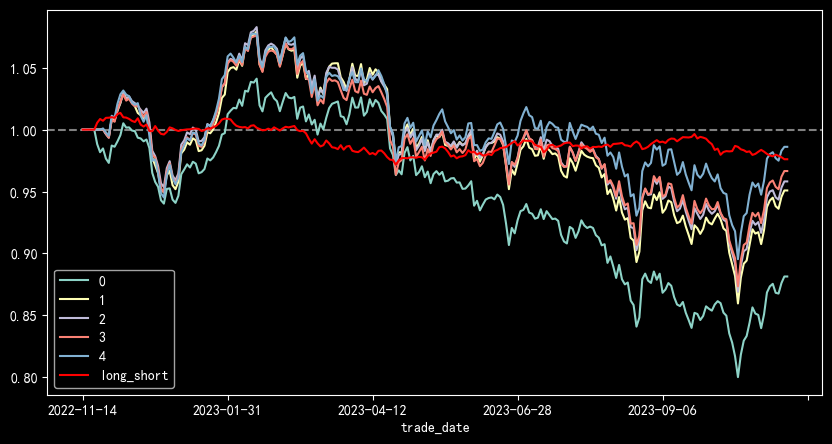

In [41]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei' # 显示汉字：SimHei黑体，simsum宋体，Microsoft YaHei雅黑。
plt.rcParams['axes.unicode_minus'] = False # 正常显示负号
plt.figure(figsize=(10, 5))
plt.axhline(y=1, color='grey', linestyle='--')
for layer in range(0, num_layers):
    # Ensure holding stocks
    hold_flag_matrix = layer_allocation.mask(layer_allocation != layer, 0).mask(layer_allocation == layer, 1)
    a = hold_flag_matrix

    # Calculate the sum of each line in turn.
    stock_amount_sum = hold_flag_matrix.sum(axis=1)
    b = stock_amount_sum

    # Calculate the weight of each stock. (Average distribution at the same level)
    weight_allocation = hold_flag_matrix.apply(lambda x: x / stock_amount_sum, axis=0).fillna(0)
    c = weight_allocation

    # Moving average. Holding days are 5.
    # Because of shift(1), value of each stock each day is the average of last 5 days' weights (exclude today).
    weight_allocation = weight_allocation.shift(1).rolling(holding_days).mean()
    d = weight_allocation

    profit = (weight_allocation * ret_matrix).sum(axis=1)

    if layer == 0:
        profit_short = profit
        # The short profit comes from the decline of the stock.
        profit_short = profit_short.apply(lambda x: x + 1 if x == 0 else -x + (1 - 0.0003))
        profit_short = profit_short.cumprod()
        profit_short *= 0.5
    elif layer == num_layers - 1:
        profit_long = profit
        profit_long = profit_long.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
        profit_long = profit_long.cumprod()
        profit_long *= 0.5

    profit = profit.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
    profit.cumprod().plot(label=layer, legend=True)

(profit_long + profit_short).plot(color='r', label='long_short', legend=True)

In [42]:
profit

trade_date
2022-11-14    1.000000
2022-11-15    1.000000
2022-11-16    1.000000
2022-11-17    1.000000
2022-11-18    1.000000
                ...   
2023-11-08    0.995124
2023-11-09    0.997918
2023-11-10    1.008203
2023-11-13    1.003236
2023-11-14    1.000000
Length: 244, dtype: float64

> Q1: Why plus 1?
>
> A1: `(weight_allocation * ret_matrix).sum(axis=1)` is <u>**profit rate**</u> each day. The total investment amount for each day is 1. We can definitely change the total investment amount to others value. For example, suppose `total_amount` = 100. The profit rate is also: `(weight_allocation * ret_matrix).sum(axis=1)`. And profit each day is `((weight_allocation * ret_matrix).sum(axis=1) + 1 - 0.0003) * total_amount`
>
> Q2: Why `cumprod()`?
> 
> A2: As we mentioned above, `(weight_allocation * ret_matrix).sum(axis=1)` is <u>**profit rate**</u> each day. If we would like to calculate the equity each day, we should use the concept of compounded return. For example, suppose we have `total_amount` = 100 on the first day. And the profit rate is 0.03. After deducting the commision, there is (0.03 - 0.0003) left. Based on these date we can calculate the equity: `total_number * (1 + 0.03 - 0.0003)`.
> On second day, we have equity based on the first day: `total_number * (1 + 0.03 - 0.0003) * (1 + rate - 0.0003)` ...

In [28]:
# hold_flag_matrix
a

ts_code,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2022-11-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2023-11-09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2023-11-10,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [29]:
# stock_amount_sum
b

trade_date
2022-11-14      0.0
2022-11-15      0.0
2022-11-16      0.0
2022-11-17      0.0
2022-11-18      0.0
              ...  
2023-11-08    975.0
2023-11-09    976.0
2023-11-10    975.0
2023-11-13    977.0
2023-11-14    976.0
Length: 244, dtype: float64

In [30]:
# weight_allocation 1
c

ts_code,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2022-11-14,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2022-11-15,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2022-11-16,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2022-11-17,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2022-11-18,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,0.000000,0.0,0.0,0.001026,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.001026,0.0,0.0,0.001026,0.001026,0.0,0.0,0.0,0.0
2023-11-09,0.000000,0.0,0.0,0.001025,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.001025,0.0,0.0,0.001025,0.001025,0.0,0.0,0.0,0.0
2023-11-10,0.001026,0.0,0.0,0.001026,0.0,0.001026,0.0,0.0,0.0,0.0,...,0.0,0.001026,0.0,0.0,0.001026,0.001026,0.0,0.0,0.0,0.0


In [31]:
# weight_allocation
d

ts_code,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2022-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,0.000412,0.000206,0.0,0.001028,0.000206,0.000206,0.0,0.0,0.000206,0.000823,...,0.0,0.000000,0.000206,0.0,0.000205,0.000205,0.000617,0.000206,0.0,0.0
2023-11-09,0.000206,0.000206,0.0,0.001027,0.000206,0.000000,0.0,0.0,0.000000,0.000617,...,0.0,0.000205,0.000000,0.0,0.000410,0.000410,0.000411,0.000206,0.0,0.0
2023-11-10,0.000000,0.000000,0.0,0.001026,0.000206,0.000000,0.0,0.0,0.000000,0.000411,...,0.0,0.000410,0.000000,0.0,0.000615,0.000615,0.000206,0.000206,0.0,0.0


#### Analyse
Here's a line-by-line analysis of the code block:
```python
for layer in range(0, num_layers):
```

This line starts a loop that iterates over each layer in the portfolio. `num_layers` is a variable that specifies the total number of layers in the portfolio.

***

```python
hold_flag_matrix = layer_allocation.mask(layer_allocation != layer, 0).mask(layer_allocation == layer, 1)
```

This line creates a binary matrix `hold_flag_matrix` that indicates whether each stock in the portfolio is held in the current layer or not. The matrix is created by applying two `mask` functions to the `layer_allocation` matrix. **The first `mask` function sets all values in `layer_allocation` that are not equal to `layer` to 0, and the second `mask` function sets all values that are equal to `layer` to 1.**

***

```python
stock_amount_sum = hold_flag_matrix.sum(axis=1)
```

This line calculates the total number of stocks held in the current layer by summing the values in each row of `hold_flag_matrix`.

***

```python
weight_allocation = hold_flag_matrix.apply(lambda x: x / stock_amount_sum, axis=0)
```

This line calculates the weight allocation for each stock in the current layer by dividing each row of `hold_flag_matrix` by `stock_amount_sum`. **The `apply` function is used to apply the lambda function to each column of the matrix.**

***

```python
weight_allocation = weight_allocation.shift(1).rolling(holding_days).mean()
```

This line calculates the rolling mean of the weight allocation matrix over a window of `holding_days`. The `shift` function is used to shift the matrix by one row so that the current day's weight allocation is based on the previous day's allocation.

***

```python
( (weight_allocation * ret_matrix).sum(axis=1) + 1 - 0.0003).cumprod().plot(label=layer, legend=True)
```

This line calculates the daily returns for the current layer by multiplying the weight allocation matrix with the matrix of daily returns `ret_matrix`, taking the sum over columns, adding 1 and subtracting a transaction cost of 0.0003, and then calculating the cumulative product of the resulting series. The resulting series is plotted using `matplotlib`, with the label for the line set to the current layer number and the legend set to True.

Overall, this code block appears to be part of a strategy for optimizing the performance of a portfolio by allocating weights to different layers of the portfolio. The code calculates the weight allocation for each stock in each layer based on the number of stocks held in that layer, and then calculates the daily returns for each layer based on the weight allocation and the matrix of daily returns. The resulting series of cumulative returns is plotted to visualize the performance of the portfolio over time.

#### `weight_allocation = hold_flag_matrix.apply(lambda x: x / stock_amount_sum, axis=0)`
Let's consider a scenario where we have a DataFrame `hold_flag_matrix` representing the number of shares held for each stock in a portfolio, and a Series `stock_amount_sum` representing the total number of shares held in each stock. We want to calculate the weight allocation for each stock based on the total number of shares held.

Here's a simple example:

```python
import pandas as pd

# Create a sample DataFrame for hold_flag_matrix
data = {
    'Stock1': [100, 150, 200],
    'Stock2': [75, 100, 125],
    'Stock3': [50, 75, 100]
}
hold_flag_matrix = pd.DataFrame(data)
print(hold_flag_matrix, '\n')

# Create a sample Series for stock_amount_sum
stock_amount_sum = hold_flag_matrix.sum(axis=1) # Calculate the sum of each row in turn.
'''
If axis=0, the sum will be calculated vertically, i.e., it will sum the 
values in each column. This means that the sum will be computed for each 
stock across the time periods.

If axis=1, the sum will be calculated horizontally, i.e., it will sum the 
values in each row. This means that the sum will be computed for each time 
period across the stocks.
'''
print(stock_amount_sum)

# Calculate the weight allocation.
weight_allocation = hold_flag_matrix.apply(lambda x: x / stock_amount_sum, axis=0)
'''
axis=0: Apply the function to each column. This means that the function 
will be applied to each column independently, with the column values 
passed as the argument to the function.

axis=1: Apply the function to each row. This means that the function will 
be applied to each row independently, with the row values passed as the 
argument to the function.
'''

weight_allocation

'''
   Stock1  Stock2  Stock3
0     100      75      50
1     150     100      75
2     200     125     100 

0    225
1    325
2    425
dtype: int64

Stock1	Stock2	Stock3
0	0.444444	0.333333	0.222222
1	0.461538	0.307692	0.230769
2	0.470588	0.294118	0.235294
'''
```

In this example, `hold_flag_matrix` represents the number of shares held for each stock over three time periods, and `stock_amount_sum` represents the total number of shares held for each stock over the same time periods.

The `apply` function is used to apply the lambda function `lambda x: x / stock_amount_sum` to each column of `hold_flag_matrix`. This lambda function divides each value in a column of `hold_flag_matrix` by the corresponding value in `stock_amount_sum`, effectively calculating the weight allocation for each stock over the three time periods.

When you run this code, you will see the resulting `weight_allocation` DataFrame, which shows the weight allocation for each stock over the three time periods based on the total number of shares held for each stock.

#### `cumprod()`
Here's an example to illustrate the usage of cumprod() function:

```python
import numpy as np

# Example array
arr = np.array([2, 3, 4, 5])

# Calculate the cumulative product
cumulative_product = np.cumprod(arr)

# Print the result
print(cumulative_product)
```

Output:
```
[ 2   6  24 120]
```

In this example, we have an array `[2, 3, 4, 5]`. The `np.cumprod()` function is used to calculate the cumulative product of the elements in the array. The result is a new array `[2, 2*3=6, 2*3*4=24, 2*3*4*5=120]`, where each element represents the cumulative product up to that position.

#### Why `cumprod()`?
The `cumprod()` function is used in the given code to calculate the cumulative product of the expression `(weight_allocation * ret_matrix).sum(axis=1) + 1 - 0.0003)` along an unspecified axis.

The reason for using `cumprod()` instead of calculating summation is that this function calculates the compounded return of a stock portfolio over time. The expression `(weight_allocation * ret_matrix).sum(axis=1)` calculates the daily return of the portfolio, which is then added to 1 and subtracted by 0.0003 (presumably a transaction cost or other fees) to get the daily compounded return. Using `cumprod()` on the resulting array calculates the cumulative compounded return of the portfolio over time.

For example, if the portfolio has a compounded daily return of 1.001 on day 1, and a compounded daily return of 1.002 on day 2, then using `cumprod()` on the array `[1.001, 1.002]` would give a resulting array `[1.001, 1.003002]`, which represents the compounded return of the portfolio over the two-day period.

#### *difference between compounded return and summative return*
Compound return refers to the growth rate of an investment over multiple periods, taking into account the reinvestment of any earnings or returns. It is calculated based on the compounding effect, where the initial investment earns a return, and that return is reinvested to generate additional returns.

In contrast, summative return, also known as simple return, calculates the total return of an investment without considering the compounding effect. It is calculated by summing up the individual returns for each period.

The key difference between compounded return and summative return lies in how they account for the reinvestment of earnings. Compounded return considers the compounding effect, resulting in exponential growth over time, while summative return treats each period's return as a separate entity, leading to linear growth. Therefore, compounded return generally reflects a higher overall return compared to summative return when the investment generates positive returns.

>Let's consider an investment of $1,000 that earns a 10% annual return over three years.
>
>If we calculate the compounded return, the initial $1,000 investment would grow by 10% in the first year to $1,100. In the second year, it would grow by another 10% to $1,210, and in the third year, it would grow to $1,331. Therefore, the compounded return over the three years would be the total growth from $1,000 to $1,331, which is approximately 33.1%.
>
>On the other hand, if we calculate the summative return, we would simply add up the 10% return for each year: 10% + 10% + 10% = 30%. Therefore, the summative return over the three years would be 30%.
>
>In this example, you can see that the compounded return of approximately 33.1% is higher than the summative return of 30% due to the compounding effect of reinvesting the returns each year.

# ic序列

In [32]:
ic_series = trade_ret.corrwith(alpha191_001_df, axis=1, method='spearman')
ic_series.fillna(value=0, inplace=True)
ic_series

trade_date
2022-11-14    0.000000
2022-11-15    0.000000
2022-11-16    0.000000
2022-11-17    0.000000
2022-11-18    0.000000
                ...   
2023-11-08   -0.132201
2023-11-09   -0.038868
2023-11-10    0.096450
2023-11-13    0.049099
2023-11-14    0.000000
Length: 244, dtype: float64

In [33]:
num_stocks = len(ic_series)
coverage_list = [1 if item != 0 else 0 for item in ic_series.values]
coverage_ratio = sum(coverage_list) / num_stocks
coverage_ratio

0.8852459016393442

#### `corr() and corrwith()`
The main difference between corr() and corrwith() is the way they calculate correlation.

1. corr(): The corr() function in pandas calculates the pairwise correlation of columns in a DataFrame or Series. It returns a correlation matrix that shows the correlation coefficient between each pair of columns. By default, it uses Pearson's correlation coefficient to measure linear relationship between variables.

Example:

`df.corr()`


2. corrwith(): The corrwith() function is used to compute pairwise correlations between two DataFrame objects or a DataFrame and a Series object along either rows or columns axis. It allows you to find the correlation between one column (or row) with other columns (or rows).

Example:

`df1.corrwith(df2)`

In summary, while both functions are used for calculating correlations, corr() computes correlations among all pairs of columns within a single DataFrame, whereas corrwith() compares one specific column/row with other columns/rows from another DataFrame or Series object.

# ic均值

In [34]:
ic_series.mean()

-0.017091898698742603

In quantitative trading, "IC" stands for Information Coefficient. The Information Coefficient (IC) is a measure used to evaluate the predictive skill of a forecast in terms of its correlation with actual outcomes. It is a statistical value that represents the correlation between predicted and actual stock returns, often used by portfolio managers and analysts to assess the performance of a quantitative investment strategy.

The IC can range from -1 to 1, where:

- A value of 1 implies a perfect positive correlation, meaning the forecasts perfectly predict the actual returns.
- A value of 0 suggests no correlation, indicating that the forecasts do not provide any predictive power regarding the actual returns.
- A value of -1 implies a perfect negative correlation, which would mean the forecasts perfectly predict the opposite of the actual returns.

An IC average value is simply the mean of multiple IC values calculated over a certain period or across various securities. It gives an overall indication of the predictive ability of the model during that time or across those securities.

If the IC average value is less than 0, it indicates that there is, on average, a negative correlation between the predictions and the actual outcomes. In practical terms, this means that the model's predictions are inversely related to actual market performance. If an analyst or a quant trader consistently gets a negative IC, it could imply that their model is systematically making incorrect predictions. Interestingly, if a model consistently achieves a negative IC, it might be possible to improve performance by taking the opposite position of the model's predictions.

However, a few points should be considered when interpreting IC values:

1. **Magnitude**: A small negative value close to zero might not be statistically significant, suggesting that the model does not have predictive power rather than having inverse predictive ability.

2. **Consistency**: If the IC fluctuates around zero without consistency, it might indicate that the model is not robust or that the strategy does not have a stable predictive edge.

3. **Statistical Significance**: It's important to test the statistical significance of the IC to determine whether the observed value is likely due to chance or if it truly indicates predictive skill.

4. **Benchmarking**: It's useful to compare the IC against benchmarks or other models to understand its relative performance.

Portfolio managers and quants typically aim for positive IC values, as this indicates that their forecasts have a directional alignment with future market movements. Negative IC values suggest that a model needs refinement or that the factors being used are not effective predictors of asset returns.

# ICIR

In [35]:
icir = ic_series.mean() / ic_series.std() # Also called t-value
icir

-0.2108994221658025

# ic分布

<Axes: >

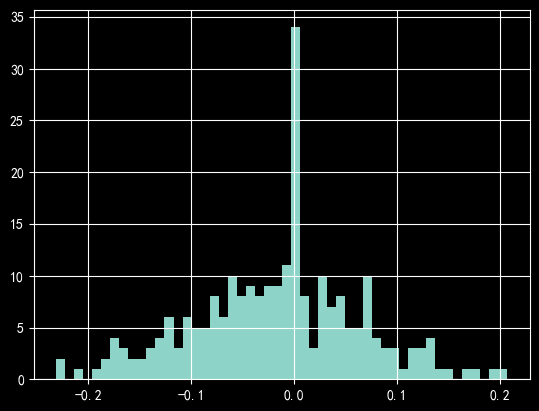

In [36]:
ic_series.hist(bins=50)

#### `ic_series.hist(bins=50)`
The code `ic_series.hist(bins=50)` is used to create a histogram plot for the data represented by the `ic_series` object. 

Here's what each part of the code means:

- `ic_series`: This is an object that represents a series of data, such as a column in a pandas DataFrame or a numpy array. It contains the data that you want to visualize in the histogram.

- `hist()`: This is a method that is called on the `ic_series` object. It is used to create a histogram plot based on the data in the series.

- `bins=50`: This parameter specifies the number of bins or intervals to divide the data range into. In this case, `bins=50` means that the data will be divided into 50 equal intervals, and the histogram will have 50 bars.

When you run `ic_series.hist(bins=50)`, it will generate a histogram plot showing the distribution of the data in `ic_series` using 50 bins. The x-axis represents the values of the data, and the y-axis represents the frequency or count of data points falling into each bin. This plot can help you understand the distribution and patterns in the data.

#### histogram plot
A histogram plot is a graphical representation of the distribution of numerical data. It consists of a series of adjacent rectangles, or bars, each representing an interval of the data. The height of each bar corresponds to the frequency or count of data points within that interval.

Here are some key features of a histogram plot:

1. **X-axis**: The x-axis of a histogram represents the range of values present in the data. This range is divided into intervals, or bins, and each bin is represented by a bar in the histogram.

2. **Y-axis**: The y-axis represents the frequency or count of data points that fall within each bin.

3. **Bars**: The height of each bar corresponds to the frequency of data points in the corresponding interval. The width of the bar may vary, but the bars are typically drawn adjacent to each other without any gap.

Histogram plots are useful for visualizing the shape, center, and spread of the data distribution. They can help identify patterns such as skewness, peaks, and outliers in the data. Histograms are commonly used in exploratory data analysis to gain insights into the characteristics of a dataset.

When you use the `hist()` method in Python (e.g., `ic_series.hist(bins=50)`), it generates a histogram plot based on the data in the series `ic_series`, using the specified number of bins. This allows you to visualize the distribution of the data and gain a better understanding of its characteristics.

#### factor yield rate

In [37]:
# Sample data for investment returns and benchmark returns
portfolio_returns = [0.03, 0.02, 0.015, 0.025, 0.022]  # Example monthly returns for the investment portfolio
benchmark_returns = [0.02, 0.018, 0.012, 0.021, 0.019]  # Example monthly returns for the benchmark index

# Calculate the average returns for the portfolio and the benchmark
average_portfolio_return = sum(portfolio_returns) / len(portfolio_returns)
average_benchmark_return = sum(benchmark_returns) / len(benchmark_returns)

# Calculate the factor yield rate for the portfolio compared to the benchmark
yield_rate = ((average_portfolio_return - average_benchmark_return) / average_benchmark_return) * 100

# Print the factor yield rate
print(f"Factor Yield Rate: {yield_rate:.2f}%")

Factor Yield Rate: 24.44%


#### Benchmark return and Risk-free return
A benchmark return refers to the performance of a specific standard or reference index against which the performance of an investment or portfolio is evaluated. The benchmark serves as a point of comparison for assessing the effectiveness of an investment strategy or portfolio management.

While a benchmark return is often associated with a broad market index such as the S&P 500 for stocks or the Barclays Capital U.S. Aggregate Bond Index for bonds, it does not necessarily represent a risk-free return. Instead, the benchmark return typically reflects the average performance of a particular market or asset class and serves as a yardstick for evaluating the relative performance of investments within that category.

The concept of a risk-free return is distinct from that of a benchmark return. The risk-free rate represents the theoretical return on an investment with no risk of financial loss, typically exemplified by the yield on government securities such as U.S. Treasury bonds. In finance, the risk-free rate is often used as a baseline for comparing the performance of other investments after adjusting for their level of risk.

In summary, while benchmark return is a reference standard for evaluating investment performance against a particular market or asset class, the risk-free return represents the theoretical return on an investment devoid of financial risk and is used as a basis for assessing the risk-adjusted performance of other investments.

`t-statistic`
$$ \hat{\lambda}=\frac{1}{T}\sum_{t=1}^{T} \lambda_t $$
$$ s.e.(\hat{\lambda})=\frac{std(\lambda_t)}{\sqrt{T}} $$
$$ t-statistic=\frac{\hat{\lambda}}{s.e.(\hat{\lambda})}=\frac{\hat{\lambda}\sqrt{T}}{std(\lambda_t)} $$
$ \lambda $ is return of the factors. If t>2(or t<-2), we consider the result of the calculation to be significant under the null hypothesis, that is, the hypothesis that the expected rate of return of the factor is 0 cannot be rejected.